In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from scipy.special import factorial

%matplotlib inline

In [2]:
images_path = Path("./images/hwk01")

## Exercise 1

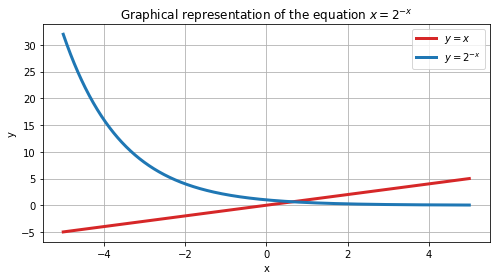

In [33]:
x_array = np.arange(-5, 5, 0.01)
y_array = 2 ** (-x_array)
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(x_array, x_array, color="tab:red", linewidth=3, label=r"$y = x$")
ax.plot(x_array, y_array, color="tab:blue", linewidth=3, label=r"$y = 2^{-x}$")
ax.set_title(r"Graphical representation of the equation $x=2^{-x}$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid()
fig.tight_layout()
plt.savefig(images_path / "exercise01.png", dpi=300)
fig.show()

## Exercise 5

In [4]:
def log_taylor_approx(x, x0, n):
    if not isinstance(n, int) or (n < 0):
        raise AttributeError("order 'n' must be an integer greater or equal than 0")
    taylor_term = lambda x, x0, k: ((-1) ** (k -1) * ((x - x0) / x0) ** k) / k
    value = np.log(x0) + np.sum([taylor_term(x, x0, k) for k in range(1, n + 1)], axis=0)
    return value

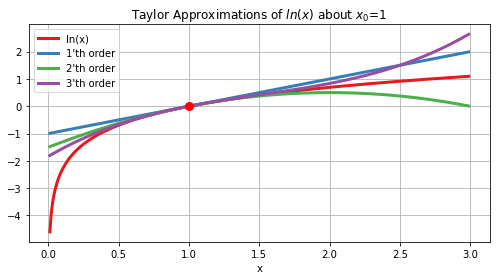

In [5]:
x0 = 1
n = 3
x_values = np.arange(0.01, 3, 0.01)

colors = plt.get_cmap("Set1").colors
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(x_values, np.log(x_values), color=colors[0], linewidth=3, label="ln(x)")
for i in range(1, n+ 1):
    ax.plot(x_values, log_taylor_approx(x_values, x0, i), color=colors[i], linewidth=3, label=f"{i}'th order")
ax.plot(x0, np.log(x0), 'ro', markersize=8)
ax.set_title(rf"Taylor Approximations of $ln(x)$ about $x_0$={x0}")
ax.set_xlabel("x")
ax.legend()
ax.grid()
fig.tight_layout()
plt.savefig(images_path / "exercise05_0_to_3.png", dpi=300)
fig.show()

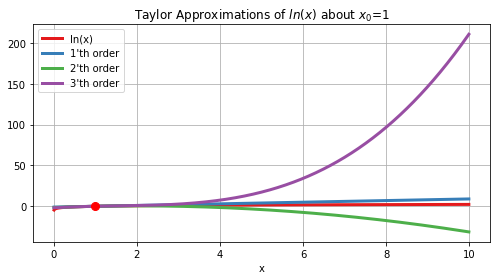

In [6]:
x0 = 1
n = 3
x_values = np.arange(0.01, 10, 0.01)

colors = plt.get_cmap("Set1").colors
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(x_values, np.log(x_values), color=colors[0], linewidth=3, label="ln(x)")
for i in range(1, n+ 1):
    ax.plot(x_values, log_taylor_approx(x_values, x0, i), color=colors[i], linewidth=3, label=f"{i}'th order")
ax.plot(x0, np.log(x0), 'ro', markersize=8)
ax.set_title(rf"Taylor Approximations of $ln(x)$ about $x_0$={x0}")
ax.set_xlabel("x")
ax.legend()
ax.grid()
fig.tight_layout()
plt.savefig(images_path / "exercise05_0_to_10.png", dpi=300)
fig.show()

In [7]:
def absolute_error(real, pred):
    return np.abs(pred - real)

def relative_error(real, pred):
    return np.abs((pred - real) / real)

In [8]:
x = 1.5 
real_value = np.log(x)
accuracy = 1e-3
error_s = pd.Series(dtype="float64", name="Relative Error").rename_axis("Degree")
converge = False
i = 0
while not converge:
    pred_value = log_taylor_approx(x, x0, i)
    error = relative_error(real_value, pred_value)
    error_s.loc[i] = error
    if error > accuracy:
        i += 1
    else:
        converge = True

In [9]:
error_s

Degree
0    1.000000
1    0.233152
2    0.075136
3    0.027626
4    0.010910
5    0.004505
6    0.001918
7    0.000835
Name: Relative Error, dtype: float64

In [10]:
print(error_s.to_latex(label="tab:q05b", caption="Relative error of Taylor approximations for each degree."))

\begin{table}
\centering
\caption{Relative error of Taylor approximations for each degree.}
\label{tab:q05b}
\begin{tabular}{lr}
\toprule
{} &  Relative Error \\
Degree &                 \\
\midrule
0      &        1.000000 \\
1      &        0.233152 \\
2      &        0.075136 \\
3      &        0.027626 \\
4      &        0.010910 \\
5      &        0.004505 \\
6      &        0.001918 \\
7      &        0.000835 \\
\bottomrule
\end{tabular}
\end{table}



## Exercise 6

In [11]:
x = 4
n = 10
xk_s = pd.Series([x], name="x_k").rename_axis("k")
print(f"x_0 = {x}")
for k in range(1, n + 1):
    x = (x ** 2 + 9) / (2 * x)
    xk_s.loc[k] = x
xk_s

x_0 = 4


k
0     4.000000
1     3.125000
2     3.002500
3     3.000001
4     3.000000
5     3.000000
6     3.000000
7     3.000000
8     3.000000
9     3.000000
10    3.000000
Name: x_k, dtype: float64

In [12]:
print(xk_s.to_latex(float_format="%.20f", label="tab:q06c", caption="First 10 terms of the sequence $\{x_k\}$."))

\begin{table}
\centering
\caption{First 10 terms of the sequence $\{x_k\}$.}
\label{tab:q06c}
\begin{tabular}{lr}
\toprule
{} &                    x\_k \\
k  &                        \\
\midrule
0  & 4.00000000000000000000 \\
1  & 3.12500000000000000000 \\
2  & 3.00249999999999994671 \\
3  & 3.00000104079933382906 \\
4  & 3.00000000000018030022 \\
5  & 2.99999999999999955591 \\
6  & 3.00000000000000044409 \\
7  & 3.00000000000000000000 \\
8  & 3.00000000000000000000 \\
9  & 3.00000000000000000000 \\
10 & 3.00000000000000000000 \\
\bottomrule
\end{tabular}
\end{table}



## Exercise 7

In [13]:
from sympy import *
from sympy.plotting import plot

In [14]:
x = symbols("x")
f = sin(x ** 2)
x0 = 0
terms_list = [2, 5, 10]
max_terms = max(terms_list)
derivative_values = {}
i = 1 
while len(derivative_values) != max_terms:
    fi = lambdify(x, diff(f, x, i), 'numpy')
    fi_x0 = fi(x0)
    if fi_x0 != 0:
        derivative_values[i + 1] = fi_x0
    i += 1

In [15]:
derivative_values

{3: 2.0,
 7: -120.0,
 11: 30240.0,
 15: -17297280.0,
 19: 17643225600.0,
 23: -28158588057600.0,
 27: 6.476475253248e+16,
 31: -2.0284320493172736e+20,
 35: 8.300343945806283e+23,
 39: -4.299578163927655e+27}

In [23]:
np.sort(list(derivative_values.keys()))

array([ 3,  7, 11, 15, 19, 23, 27, 31, 35, 39])

In [53]:
def q7_taylor_approx(x, n_terms, derivative_values):
    x = np.asarray(x)
    if not isinstance(n, int) or (n < 1):
        raise AttributeError("'n_terms' must be an integer greater than 0")
    derivatives = {k: v for k, v in derivative_values.items() if k in np.sort(list(derivative_values.keys()))[:n_terms]}
    output = np.sum([value * (x ** i) / factorial(i) for i, value in derivatives.items()], axis=0)
    return output

{3: 2.0}
0.323433000000000


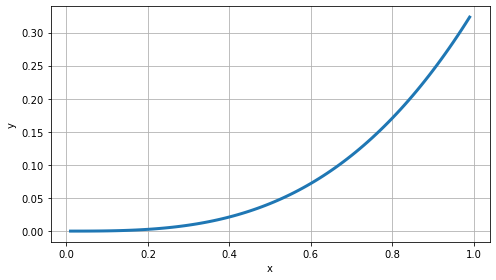

In [58]:
x_array = np.arange(0.01, 1, 0.01)
y_array = q7_taylor_approx(x_array, 1, derivative_values)
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(x_array, y_array, color="tab:blue", linewidth=3)
# ax.set_title(r"Graphical representation of the equation $x=2^{-x}$")
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.legend()
ax.grid()
fig.tight_layout()
# plt.savefig(images_path / "exercise01.png", dpi=300)
fig.show()